In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
folder1 = "database/raw/data_jupyternotebooks"
folder2 = "Chilean"
años = [2023, 2022, 2021]
torneos = []

for año in años:
    match_file = f"estadisticas_partidos_{año}.csv"
    path_matches = os.path.join(folder1, folder2, match_file)
    matches = pd.read_csv(path_matches)
    torneos.append(matches)

# 2023

In [65]:
torneo2023 = torneos[0]

In [66]:
torneo2023.head()

,round,team_home,team_away,home_score,away_score,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,...,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away
0,30,Curicó Unido,Colo Colo,0,1,0.07,2.31,32,68,5,...,29,33,4,11,11,8,5,8,NaN,NaN
1,30,Huachipato,Audax Italiano,2,0,1.34,0.45,64,36,12,...,45,35,13,9,12,12,7,4,NaN,NaN
2,30,Unión Española,Cobresal,1,0,1.09,0.54,65,35,26,...,59,66,18,14,18,19,3,11,NaN,NaN
3,30,Deportes Copiapó,Everton de Viña del Mar,2,0,1.21,0.59,36,64,10,...,35,35,11,9,13,9,7,2,NaN,NaN
4,30,Deportes Magallanes,Coquimbo Unido,2,3,1.62,1.82,57,43,13,...,34,32,9,11,10,6,5,1,NaN,NaN


In [67]:
torneo2023.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   round                       240 non-null    int64  
 1   team_home                   240 non-null    object 
 2   team_away                   240 non-null    object 
 3   home_score                  240 non-null    int64  
 4   away_score                  240 non-null    int64  
 5   expected_goals_home         240 non-null    float64
 6   expected_goals_away         240 non-null    float64
 7   posession_home              240 non-null    int64  
 8   posession_away              240 non-null    int64  
 9   total_shots_home            240 non-null    int64  
 10  total_shots_away            240 non-null    int64  
 11  shots_on_target_home        240 non-null    int64  
 12  shots_on_target_away        240 non-null    int64  
 13  shots_off_target_home       240 non

In [68]:
pd.set_option('display.max_rows', None)
print(torneo2023.isna().sum())
print(torneo2023.isna().sum().sum())

round                           0
team_home                       0
team_away                       0
home_score                      0
away_score                      0
expected_goals_home             0
expected_goals_away             0
posession_home                  0
posession_away                  0
total_shots_home                0
total_shots_away                0
shots_on_target_home            0
shots_on_target_away            0
shots_off_target_home           0
shots_off_target_away           0
blocked_shots_home              0
blocked_shots_away              0
corner_kicks_home               0
corner_kicks_away               0
offsides_home                  13
offsides_away                  13
fouls_home                      0
fouls_away                      0
yellow_cards_home               0
yellow_cards_away               0
red_cards_home                  0
red_cards_away                  0
free_kicks_home                 0
free_kicks_away                 0
throw_ins_home

Se trabajará con el dataframe anterior del 2023 que si contenía toda la info

In [69]:
folder = "database/raw/data_jupyternotebooks"
match_file = "estadisticas_partidos.csv"

path_matches = os.path.join(folder, match_file)
matches = pd.read_csv(path_matches)

In [70]:
print(matches.isna().sum())
print(matches.isna().sum().sum())

team_home                 0
team_away                 0
score_home                0
score_away                0
expected_goals_home       0
expected_goals_away       0
posession_home            0
posession_away            0
total_shots_home          0
total_shots_away          0
shots_on_target_home      0
shots_on_target_away      0
shots_off_target_home     0
shots_off_target_away     0
blocked_shots_home        0
blocked_shots_away        0
corner_kicks_home         0
corner_kicks_away         0
offsides_home             0
offsides_away             0
fouls_home                0
fouls_away                0
yellow_cards_home         0
yellow_cards_away         0
red_cards_home            0
red_cards_away            0
free_kicks_home           0
free_kicks_away           0
throw_ins_home            0
throw_ins_away            0
goal_kicks_home           0
goal_kicks_away           0
shots_inside_box_home     0
shots_inside_box_away     0
shots_outside_box_home    0
shots_outside_box_aw

In [71]:
matches.columns.values

array(['team_home', 'team_away', 'score_home', 'score_away',
       'expected_goals_home', 'expected_goals_away', 'posession_home',
       'posession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away',
       'shots_off_target_home', 'shots_off_target_away',
       'blocked_shots_home', 'blocked_shots_away', 'corner_kicks_home',
       'corner_kicks_away', 'offsides_home', 'offsides_away',
       'fouls_home', 'fouls_away', 'yellow_cards_home',
       'yellow_cards_away', 'red_cards_home', 'red_cards_away',
       'free_kicks_home', 'free_kicks_away', 'throw_ins_home',
       'throw_ins_away', 'goal_kicks_home', 'goal_kicks_away',
       'shots_inside_box_home', 'shots_inside_box_away',
       'shots_outside_box_home', 'shots_outside_box_away',
       'goalkeeper_saves_home', 'goalkeeper_saves_away', 'passes_home',
       'passes_away', 'accurate_passes_home', 'accurate_passes_away',
       'long_balls_home', 'long_balls_away', 'crosses

Agregar round a dataframe antiguo

In [72]:
matches.insert(0, "round", 0)
matches.head()

,round,team_home,team_away,score_home,score_away,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,...,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away
0,0,Curicó Unido,Colo Colo,0,1,0.07,2.31,32,68,5,...,29,33,4,11,11,8,5,8,23,8
1,0,Huachipato,Audax Italiano,2,0,1.34,0.45,64,36,12,...,45,35,13,9,12,12,7,4,19,28
2,0,Unión Española,Cobresal,1,0,1.09,0.54,65,35,26,...,59,66,18,14,18,19,3,11,24,24
3,0,Deportes Copiapó,Everton de Viña del Mar,2,0,1.21,0.59,36,64,10,...,35,35,11,9,13,9,7,2,28,13
4,0,Deportes Magallanes,Coquimbo Unido,2,3,1.62,1.82,57,43,13,...,34,32,9,11,10,6,5,1,16,20


In [73]:
matches.loc[0, ["round"]]=1

In [74]:
for index in matches.index:
    if index != 103: # problema en estadisticas_partidos_2023
        matches.loc[index, ['round']] = torneo2023[((torneo2023["team_home"] == matches.loc[index]["team_home"]) & (torneo2023["team_away"] == matches.loc[index]["team_away"]))]["round"].values[0]

In [75]:
matches.loc[103, ['round']] = 18

In [76]:
matches.head()

,round,team_home,team_away,score_home,score_away,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,...,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away,clearences_home,clearences_away
0,30,Curicó Unido,Colo Colo,0,1,0.07,2.31,32,68,5,...,29,33,4,11,11,8,5,8,23,8
1,30,Huachipato,Audax Italiano,2,0,1.34,0.45,64,36,12,...,45,35,13,9,12,12,7,4,19,28
2,30,Unión Española,Cobresal,1,0,1.09,0.54,65,35,26,...,59,66,18,14,18,19,3,11,24,24
3,30,Deportes Copiapó,Everton de Viña del Mar,2,0,1.21,0.59,36,64,10,...,35,35,11,9,13,9,7,2,28,13
4,30,Deportes Magallanes,Coquimbo Unido,2,3,1.62,1.82,57,43,13,...,34,32,9,11,10,6,5,1,16,20


# Creación de tabla de información de cada equipo

In [77]:
def remove_suffix(item):
    return item.replace("_home", "").replace("_away", "")

column = [remove_suffix(item) for item in matches.columns]
columnas = []
[columnas.append(x) for x in column if x not in columnas]
columnas.remove("round")
columnas.remove("team")
columnas[0] = "score_prom"
print(columnas)

['score_prom', 'expected_goals', 'posession', 'total_shots', 'shots_on_target', 'shots_off_target', 'blocked_shots', 'corner_kicks', 'offsides', 'fouls', 'yellow_cards', 'red_cards', 'free_kicks', 'throw_ins', 'goal_kicks', 'shots_inside_box', 'shots_outside_box', 'goalkeeper_saves', 'passes', 'accurate_passes', 'long_balls', 'crosses', 'dribbles', 'possesion_lost', 'duels_won', 'aerials_won', 'tackles', 'interceptions', 'clearences']


In [78]:
columnas.append("wins")
columnas.append("ties")
columnas.append("losses")
columnas.append("total_goals")
columnas.append("total_goals_conceded")
columnas.append("points")
columnas.append("streak")
columnas.append("wins_in_last_5_matches")
columnas.append("ties_in_last_5_matches")
columnas.append("losses_in_last_5_matches")


In [79]:
print(columnas)

['score_prom', 'expected_goals', 'posession', 'total_shots', 'shots_on_target', 'shots_off_target', 'blocked_shots', 'corner_kicks', 'offsides', 'fouls', 'yellow_cards', 'red_cards', 'free_kicks', 'throw_ins', 'goal_kicks', 'shots_inside_box', 'shots_outside_box', 'goalkeeper_saves', 'passes', 'accurate_passes', 'long_balls', 'crosses', 'dribbles', 'possesion_lost', 'duels_won', 'aerials_won', 'tackles', 'interceptions', 'clearences', 'wins', 'ties', 'losses', 'total_goals', 'total_goals_conceded', 'points', 'streak', 'wins_in_last_5_matches', 'ties_in_last_5_matches', 'losses_in_last_5_matches']


In [80]:
#for ronda in list(set(matches["round"].values)):
#    continue

In [81]:
equipos = matches["team_home"].unique()
stats = columnas

tabla = {}

for equipo in equipos:

    tabla[equipo] = dict.fromkeys(stats, 0)
    tabla[equipo]["last_5_matches"] = list()

print(tabla)

{'Curicó Unido': {'score_prom': 0, 'expected_goals': 0, 'posession': 0, 'total_shots': 0, 'shots_on_target': 0, 'shots_off_target': 0, 'blocked_shots': 0, 'corner_kicks': 0, 'offsides': 0, 'fouls': 0, 'yellow_cards': 0, 'red_cards': 0, 'free_kicks': 0, 'throw_ins': 0, 'goal_kicks': 0, 'shots_inside_box': 0, 'shots_outside_box': 0, 'goalkeeper_saves': 0, 'passes': 0, 'accurate_passes': 0, 'long_balls': 0, 'crosses': 0, 'dribbles': 0, 'possesion_lost': 0, 'duels_won': 0, 'aerials_won': 0, 'tackles': 0, 'interceptions': 0, 'clearences': 0, 'wins': 0, 'ties': 0, 'losses': 0, 'total_goals': 0, 'total_goals_conceded': 0, 'points': 0, 'streak': 0, 'wins_in_last_5_matches': 0, 'ties_in_last_5_matches': 0, 'losses_in_last_5_matches': 0, 'last_5_matches': []}, 'Huachipato': {'score_prom': 0, 'expected_goals': 0, 'posession': 0, 'total_shots': 0, 'shots_on_target': 0, 'shots_off_target': 0, 'blocked_shots': 0, 'corner_kicks': 0, 'offsides': 0, 'fouls': 0, 'yellow_cards': 0, 'red_cards': 0, 'free_

In [82]:
new_stats = ["wins",
"ties",
"losses",
"total_goals",
"total_goals_conceded",
"points",
"streak",
"wins_in_last_5_matches",
"ties_in_last_5_matches",
"losses_in_last_5_matches"]
procesated_matches_columns = list(matches.columns)
procesated_matches_columns.insert(5, "score_prom_away")
procesated_matches_columns.insert(5, "score_prom_home")

for stat in new_stats:
    procesated_matches_columns.append(f"{stat}_home")
    procesated_matches_columns.append(f"{stat}_away")

procesated_matches = pd.DataFrame(columns = procesated_matches_columns)
procesated_matches.head()

,round,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,expected_goals_home,expected_goals_away,posession_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away


In [83]:
print(stats[stats.index("wins"):])

['wins', 'ties', 'losses', 'total_goals', 'total_goals_conceded', 'points', 'streak', 'wins_in_last_5_matches', 'ties_in_last_5_matches', 'losses_in_last_5_matches']


In [84]:
for index in reversed(matches.index):
    
    """Escribir info en el nuevo df de partidos con la información hasta el partido la cual esta almacenada en 'tabla'"""
    match = matches.loc[index]
    team_home = match["team_home"]
    team_away = match["team_away"]

    stats_home = tabla[team_home]
    stats_away = tabla[team_away]

    fila = []
    fila.append(match["round"])
    fila.append(team_home)
    fila.append(team_away)
    fila.append(match["score_home"])
    fila.append(match["score_away"])

    for stat in stats:
        
        fila.append(tabla[team_home][stat])
        fila.append(tabla[team_away][stat])
    
    procesated_matches.loc[len(procesated_matches)] = fila
    
    """ Actualizar la tabla con lo que realmente ocurrió en ese partido"""

    round = match["round"]
    
    ## stats promediadas:
    for stat in stats[:stats.index("wins")]:
        if stat == "score_prom":
            tabla[team_home][stat] = (tabla[team_home][stat]*(round-1) + match["score_home"])/round
            tabla[team_away][stat] = (tabla[team_away][stat]*(round-1) + match["score_away"])/round
        else:
            tabla[team_home][stat] = (tabla[team_home][stat]*(round-1) + match[f"{stat}_home"])/round
            tabla[team_away][stat] = (tabla[team_away][stat]*(round-1) + match[f"{stat}_away"])/round
        
    ## stats acumuladas
    
    empate = False
    if match["score_home"] > match["score_away"]:

        #victorias / derrotas
        tabla[team_home]["wins"] += 1
        tabla[team_away]["losses"] += 1

        #goles a favor
        tabla[team_home]["total_goals"] += match["score_home"]
        tabla[team_away]["total_goals"] += match["score_away"]

        #goles en contra
        tabla[team_home]["total_goals_conceded"] += match["score_away"]
        tabla[team_away]["total_goals_conceded"] += match["score_home"]

        #puntos
        tabla[team_home]["points"] += 3

        # racha
        tabla[team_home]["streak"] += 1
        tabla[team_away]["streak"] = 0

        # ultimos 5 partidos
        if len(tabla[team_home]["last_5_matches"]) == 5:
            tabla[team_home]["last_5_matches"].pop(0)
        if len(tabla[team_away]["last_5_matches"]) == 5:
            tabla[team_away]["last_5_matches"].pop(0)

        tabla[team_home]["last_5_matches"].append("W")
        tabla[team_away]["last_5_matches"].append("L")


    elif match["score_home"] < match["score_away"]:

        #victorias / derrotas
        tabla[team_away]["wins"] += 1
        tabla[team_home]["losses"] += 1

        #goles a favor
        tabla[team_away]["total_goals"] += match["score_away"]
        tabla[team_home]["total_goals"] += match["score_home"]

        #goles en contra
        tabla[team_away]["total_goals_conceded"] += match["score_home"]
        tabla[team_home]["total_goals_conceded"] += match["score_away"]

        #puntos
        tabla[team_away]["points"] += 3

        # racha
        tabla[team_away]["streak"] += 1
        tabla[team_home]["streak"] = 0

        # ultimos 5 partidos
        if len(tabla[team_home]["last_5_matches"]) == 5:
            tabla[team_home]["last_5_matches"].pop(0)
        if len(tabla[team_away]["last_5_matches"]) == 5:
            tabla[team_away]["last_5_matches"].pop(0)

        tabla[team_away]["last_5_matches"].append("W")
        tabla[team_home]["last_5_matches"].append("L")

    else:
        #empate
        tabla[team_home]["ties"] += 1
        tabla[team_away]["ties"] += 1

        #goles a favor
        tabla[team_home]["total_goals"] += match["score_home"]
        tabla[team_away]["total_goals"] += match["score_away"]

        #goles en contra
        tabla[team_home]["total_goals_conceded"] += match["score_away"]
        tabla[team_away]["total_goals_conceded"] += match["score_home"]

        #puntos
        tabla[team_home]["points"] += 1
        tabla[team_away]["points"] += 1

        # racha
        tabla[team_away]["streak"] += 1
        tabla[team_home]["streak"] += 1

        # ultimos 5 partidos
        if len(tabla[team_home]["last_5_matches"]) == 5:
            tabla[team_home]["last_5_matches"].pop(0)
        if len(tabla[team_away]["last_5_matches"]) == 5:
            tabla[team_away]["last_5_matches"].pop(0)

        tabla[team_away]["last_5_matches"].append("T")
        tabla[team_home]["last_5_matches"].append("T")

    tabla[team_home]["wins_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("W")
    tabla[team_home]["ties_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("T")
    tabla[team_home]["losses_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("L")

    tabla[team_away]["wins_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("W")
    tabla[team_away]["ties_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("T")
    tabla[team_away]["losses_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("L")


In [85]:
procesated_matches.tail()

,round,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,expected_goals_home,expected_goals_away,posession_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
235,30,Deportes Magallanes,Coquimbo Unido,2,3,1.172414,1.379310,1.215862,1.516552,53.620690,...,29,44,3,0,2,3,1,0,2,2
236,30,Deportes Copiapó,Everton de Viña del Mar,2,0,1.034483,1.448276,1.413448,1.642414,46.068966,...,31,45,2,0,1,3,2,1,2,1
237,30,Unión Española,Cobresal,1,0,1.344828,1.931034,1.235172,1.610345,50.172414,...,36,56,1,2,1,3,2,1,2,1
238,30,Huachipato,Audax Italiano,2,0,1.586207,1.241379,1.527241,1.240345,56.379310,...,54,35,10,0,3,2,2,0,0,3
239,30,Curicó Unido,Colo Colo,0,1,1.034483,1.517241,1.353793,1.441379,48.724138,...,23,51,0,0,0,3,2,0,3,2


In [86]:
'''lista = stats[:stats.index("wins")]
lista2 = []
for stat in lista:
    lista2.append(f"{stat}_home")
    lista2.append(f"{stat}_away")
procesated_matches = procesated_matches.drop(columns = lista2)
procesated_matches.tail()'''

'lista = stats[:stats.index("wins")]\nlista2 = []\nfor stat in lista:\n    lista2.append(f"{stat}_home")\n    lista2.append(f"{stat}_away")\nprocesated_matches = procesated_matches.drop(columns = lista2)\nprocesated_matches.tail()'

# ML

In [87]:
matches = procesated_matches

In [88]:
matches.tail()

,round,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,expected_goals_home,expected_goals_away,posession_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
235,30,Deportes Magallanes,Coquimbo Unido,2,3,1.172414,1.379310,1.215862,1.516552,53.620690,...,29,44,3,0,2,3,1,0,2,2
236,30,Deportes Copiapó,Everton de Viña del Mar,2,0,1.034483,1.448276,1.413448,1.642414,46.068966,...,31,45,2,0,1,3,2,1,2,1
237,30,Unión Española,Cobresal,1,0,1.344828,1.931034,1.235172,1.610345,50.172414,...,36,56,1,2,1,3,2,1,2,1
238,30,Huachipato,Audax Italiano,2,0,1.586207,1.241379,1.527241,1.240345,56.379310,...,54,35,10,0,3,2,2,0,0,3
239,30,Curicó Unido,Colo Colo,0,1,1.034483,1.517241,1.353793,1.441379,48.724138,...,23,51,0,0,0,3,2,0,3,2


In [89]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["score_home"] > match["score_away"]:
        results.append(1)
    elif match["score_home"] < match["score_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [90]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/240}%")

Resultado 0, hay: 59 partidos, 24.583333333333332%
Resultado 1, hay: 97 partidos, 40.416666666666664%
Resultado 2, hay: 84 partidos, 35.0%


In [29]:
result = matches["result"]
matches = matches.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "round"])
matches.tail()

,score_prom_home,score_prom_away,expected_goals_home,expected_goals_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
235,1.172414,1.379310,1.215862,1.516552,53.620690,42.000000,12.413793,12.689655,4.172414,4.793103,...,29,44,3,0,2,3,1,0,2,2
236,1.034483,1.448276,1.413448,1.642414,46.068966,52.034483,12.448276,14.724138,4.310345,5.206897,...,31,45,2,0,1,3,2,1,2,1
237,1.344828,1.931034,1.235172,1.610345,50.172414,47.551724,13.206897,13.551724,4.896552,4.758621,...,36,56,1,2,1,3,2,1,2,1
238,1.586207,1.241379,1.527241,1.240345,56.379310,47.448276,13.655172,13.137931,4.379310,3.827586,...,54,35,10,0,3,2,2,0,0,3
239,1.034483,1.517241,1.353793,1.441379,48.724138,53.379310,12.517241,14.310345,3.586207,4.172414,...,23,51,0,0,0,3,2,0,3,2


In [30]:
X = matches.to_numpy()
scaler = preprocessing.StandardScaler()
X_escalados = scaler.fit_transform(X)
y = result

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_escalados, y, test_size=0.3, random_state = 1, stratify=y)

## Regresión logística

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.29      0.28      0.29        18
           1       0.46      0.38      0.42        29
           2       0.39      0.48      0.43        25

    accuracy                           0.39        72
   macro avg       0.38      0.38      0.38        72
weighted avg       0.39      0.39      0.39        72



In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


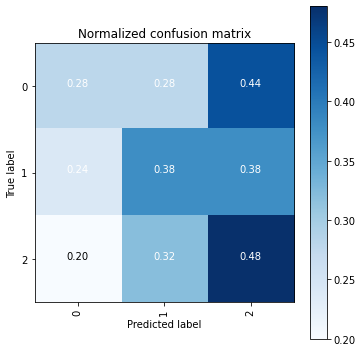

In [34]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [35]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.3611111111111111
For kernel = poly, the accuracy is: 0.4027777777777778
For kernel = rbf, the accuracy is: 0.3611111111111111
For kernel = sigmoid, the accuracy is: 0.3194444444444444


In [38]:
from sklearn.svm import SVC

svm = SVC(kernel = "poly")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.41      1.00      0.58        29
           2       0.00      0.00      0.00        25

    accuracy                           0.40        72
   macro avg       0.14      0.33      0.19        72
weighted avg       0.16      0.40      0.23        72



c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Normalized confusion matrix


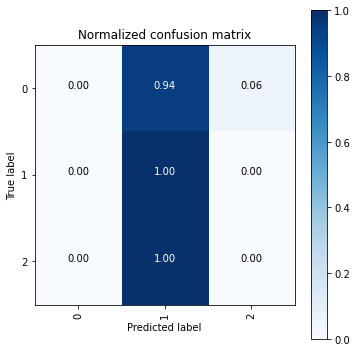

In [39]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.3888888888888889
For min_samples_split = 50 and t = 100 The accuracy is : 0.3472222222222222
For min_samples_split = 50 and t = 200 The accuracy is : 0.3611111111111111
For min_samples_split = 50 and t = 500 The accuracy is : 0.3611111111111111
For min_samples_split = 50 and t = 1000 The accuracy is : 0.3472222222222222
For min_samples_split = 20 and t = 50 The accuracy is : 0.4166666666666667
For min_samples_split = 20 and t = 100 The accuracy is : 0.4166666666666667
For min_samples_split = 20 and t = 200 The accuracy is : 0.3611111111111111
For min_samples_split = 20 and t = 500 The accuracy is : 0.375
For min_samples_split = 20 and t = 1000 The accuracy is : 0.3611111111111111
For min_samples_split = 10 and t = 50 The accuracy is : 0.3472222222222222
For min_samples_split = 10 and t = 100 The accuracy is : 0.3611111111111111
For min_samples_split = 10 and t = 200 The accuracy is : 0.3333333333333333
For min_samples_split = 10

In [44]:
rf = RandomForestClassifier(min_samples_split=20, n_estimators=50, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.40      0.62      0.49        29
           2       0.44      0.44      0.44        25

    accuracy                           0.42        72
   macro avg       0.45      0.37      0.34        72
weighted avg       0.44      0.42      0.37        72



Normalized confusion matrix


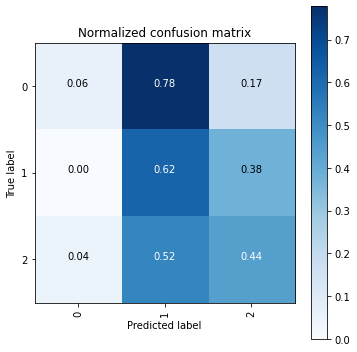

In [45]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.3194444444444444
For max_depth = 2 and t = 100 The accuracy is : 0.3055555555555556
For max_depth = 2 and t = 200 The accuracy is : 0.2916666666666667
For max_depth = 2 and t = 500 The accuracy is : 0.3472222222222222
For max_depth = 2 and t = 1000 The accuracy is : 0.3333333333333333
For max_depth = 3 and t = 50 The accuracy is : 0.3194444444444444
For max_depth = 3 and t = 100 The accuracy is : 0.3888888888888889
For max_depth = 3 and t = 200 The accuracy is : 0.3333333333333333
For max_depth = 3 and t = 500 The accuracy is : 0.375
For max_depth = 3 and t = 1000 The accuracy is : 0.3888888888888889
For max_depth = 4 and t = 50 The accuracy is : 0.3472222222222222
For max_depth = 4 and t = 100 The accuracy is : 0.3611111111111111
For max_depth = 4 and t = 200 The accuracy is : 0.375
For max_depth = 4 and t = 500 The accuracy is : 0.2916666666666667
For max_depth = 4 and t = 1000 The accuracy is : 0.375
For max_depth = 5 and t = 50 The a

In [41]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), n_estimators=100, random_state=0)

ada.fit(X_train, y_train)

predicted_ada = ada.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_ada))

Clasification report
              precision    recall  f1-score   support

           0       0.40      0.11      0.17        18
           1       0.44      0.66      0.53        29
           2       0.42      0.40      0.41        25

    accuracy                           0.43        72
   macro avg       0.42      0.39      0.37        72
weighted avg       0.42      0.43      0.40        72



Normalized confusion matrix


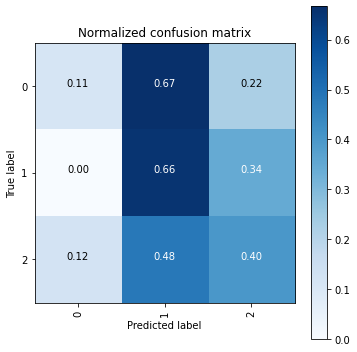

In [42]:
cnf_matrix = confusion_matrix(y_test, predicted_ada)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = GradientBoostingClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For max_depth = 2 and t = 50 The accuracy is : 0.3472222222222222
For max_depth = 2 and t = 100 The accuracy is : 0.3611111111111111
For max_depth = 2 and t = 200 The accuracy is : 0.3333333333333333
For max_depth = 2 and t = 500 The accuracy is : 0.3611111111111111
For max_depth = 2 and t = 1000 The accuracy is : 0.3194444444444444
For max_depth = 3 and t = 50 The accuracy is : 0.3611111111111111
For max_depth = 3 and t = 100 The accuracy is : 0.4027777777777778
For max_depth = 3 and t = 200 The accuracy is : 0.375
For max_depth = 3 and t = 500 The accuracy is : 0.3888888888888889
For max_depth = 3 and t = 1000 The accuracy is : 0.375
For max_depth = 4 and t = 50 The accuracy is : 0.375
For max_depth = 4 and t = 100 The accuracy is : 0.3472222222222222
For max_depth = 4 and t = 200 The accuracy is : 0.3055555555555556
For max_depth = 4 and t = 500 The accuracy is : 0.3333333333333333
For max_depth = 4 and t = 1000 The accuracy is : 0.3611111111111111
For max_depth = 5 and t = 50 The a

In [52]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth =8, random_state=0)

gb.fit(X_train, y_train)

predicted_gb = gb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_gb))

Clasification report
              precision    recall  f1-score   support

           0       0.40      0.22      0.29        18
           1       0.45      0.59      0.51        29
           2       0.42      0.40      0.41        25

    accuracy                           0.43        72
   macro avg       0.42      0.40      0.40        72
weighted avg       0.42      0.43      0.42        72



Normalized confusion matrix


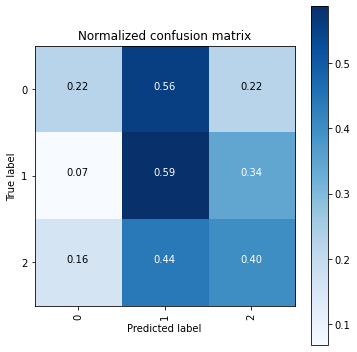

In [53]:
cnf_matrix = confusion_matrix(y_test, predicted_gb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## XGboost

In [49]:
from xgboost import XGBClassifier


range_T = [50, 100, 200, 500, 1000]




for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =3, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =4, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =5, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =6, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 6 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =7, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 7 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = XGBClassifier(n_estimators=t_, max_depth =8, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 8 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.3194444444444444
For max_depth = 2 and t = 100 The accuracy is : 0.3055555555555556
For max_depth = 2 and t = 200 The accuracy is : 0.3055555555555556
For max_depth = 2 and t = 500 The accuracy is : 0.3472222222222222
For max_depth = 2 and t = 1000 The accuracy is : 0.3472222222222222
For max_depth = 3 and t = 50 The accuracy is : 0.375
For max_depth = 3 and t = 100 The accuracy is : 0.3888888888888889
For max_depth = 3 and t = 200 The accuracy is : 0.3888888888888889
For max_depth = 3 and t = 500 The accuracy is : 0.3611111111111111
For max_depth = 3 and t = 1000 The accuracy is : 0.3611111111111111
For max_depth = 4 and t = 50 The accuracy is : 0.3333333333333333
For max_depth = 4 and t = 100 The accuracy is : 0.3472222222222222
For max_depth = 4 and t = 200 The accuracy is : 0.375
For max_depth = 4 and t = 500 The accuracy is : 0.3472222222222222
For max_depth = 4 and t = 1000 The accuracy is : 0.3333333333333333
For max_depth = 5 and

In [54]:
xgb = XGBClassifier(max_depth = 7, n_estimators = 500)

xgb.fit(X_train, y_train)

predicted_xgb = xgb.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_xgb))


Clasification report
              precision    recall  f1-score   support

           0       0.44      0.22      0.30        18
           1       0.44      0.55      0.49        29
           2       0.37      0.40      0.38        25

    accuracy                           0.42        72
   macro avg       0.42      0.39      0.39        72
weighted avg       0.42      0.42      0.41        72



Normalized confusion matrix


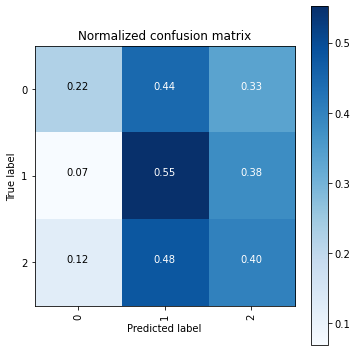

In [55]:
cnf_matrix = confusion_matrix(y_test, predicted_xgb)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## MLP

In [56]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5056      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 7235 (28.26 KB)
Trainable params: 7235 (28.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [58]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=1000, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
1/1 [==============================] - 1s 787ms/step - loss: 1.1358 - accuracy: 0.3492 - val_loss: 1.1828 - val_accuracy: 0.4286
Epoch 2/300
1/1 [==============================] - 0s 27ms/step - loss: 1.0948 - accuracy: 0.3730 - val_loss: 1.1169 - val_accuracy: 0.4048
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 1.0598 - accuracy: 0.3889 - val_loss: 1.0683 - val_accuracy: 0.3810
Epoch 4/300
1/1 [==============================] - 0s 25ms/step - loss: 1.0322 - accuracy: 0.4365 - val_loss: 1.0435 - val_accuracy: 0.4286
Epoch 5/300
1/1 [==============================] - 0s 26ms/step - loss: 1.0115 - accuracy: 0.4603 - val_loss: 1.0355 - val_accuracy: 0.4048
Epoch 6/300
1/1 [==============================] - 0s 26ms/step - loss: 0.9929 - accuracy: 0.4841 - val_loss: 1.0351 - val_accuracy: 0.4048
Epoch 7/300
1/1 [==============================] - 0s 24ms/step - loss: 0.9742 - accuracy: 0.5159 - val_loss: 1.0398 - val_accuracy: 0.4286
Epoch 8/300
1/1 [==

In [59]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

3/3 [==============================] - 0s 999us/step


In [60]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.25      0.11      0.15        18
           1       0.50      0.62      0.55        29
           2       0.43      0.48      0.45        25

    accuracy                           0.44        72
   macro avg       0.39      0.40      0.39        72
weighted avg       0.41      0.44      0.42        72



Normalized confusion matrix


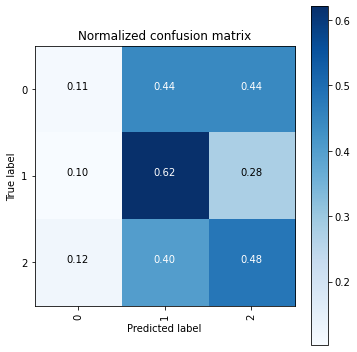

In [61]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()